# ML -multilabel classification

- Using multilearn API  
ref.: https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

- using onehotencoder for multilabel classification

## (I) Import and prepare dataset

### (a) Import data

In [1]:
#import data
import pandas as pd

df=pd.read_csv('NIST_selected_organic_spectra.csv')

df.head()

,Unnamed: 0,600,604,608,612,616,620,624,628,632,...,3464,3468,3472,3476,3480,3484,3488,3492,3496,label
0,1119-40-0,0.009480,0.011373,0.008950,0.010881,0.012741,0.012765,0.011669,0.010218,0.008583,...,0.007078,0.007871,0.009175,0.010160,0.010963,0.015177,0.013968,0.014654,0.014541,ester
1,120-33-2,0.001862,0.002358,0.000965,0.001367,0.001221,0.002217,0.001162,0.000631,0.001026,...,0.007558,0.006625,0.004902,0.004450,0.003911,0.003702,0.003551,0.002494,0.002388,ester
2,120-51-4,0.011749,0.009791,0.006795,0.006387,0.006919,0.005475,0.004003,0.002257,0.002252,...,0.005814,0.004950,0.004097,0.003773,0.003183,0.002548,0.002194,0.002459,0.002356,ester
3,120650-77-3,0.004431,0.005630,0.005578,0.005711,0.004729,0.003658,0.004980,0.003962,0.003673,...,0.004496,0.005218,0.003233,0.006065,0.004307,0.004863,0.005305,0.003419,0.005081,ester
4,1335-40-6,0.026083,0.025300,0.025201,0.024101,0.023793,0.022894,0.020080,0.016694,0.013240,...,0.005708,0.005478,0.005245,0.005083,0.005195,0.005259,0.005337,0.005369,0.005188,ester


In [2]:
df.shape #check


(405, 727)

### (b) Apply multilabel  

ref.: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

- The labels are:

In [3]:
#get the label names:
df.label.unique()

array(['ester', 'ketone', 'alcohol', 'alkane', 'alkene', 'amine',
       'aldehyde', 'acid', 'halide', 'benzene'], dtype=object)

#we have nine labels:  
#ref.: Brian C. Smith, "Infrared Spectral Interpretation: A Systematic Approach", CRC Press 1998.  
#Note: Aldehydes have the characteristic C-H stretch, denoted here as C-H_ald to differentiate from ketones.  

label_names=  
['C-H', 'C=C', \  #1,2    
'C=O', 'C-O', \  #3,4  
'O-H', 'C-N', \  #5,6  
'N-H', 'C-X', \  #7,8  
'Ar', 'C-H_ald'] #9,10    

Cheat-sheet:  
    ester=(1,3,4,,,,,,)  
    ketone=(1,3,,,,,,,)  
    alcohol=(1,4,,,,,,,)  
    alkane=(1,2,,,,,,,)  
    alkene=(1,2,,,,,,,)  
    amine=(1,6,7,,,,,,)  
    aldehyde=(1,3,10,,,,,,)  
    alcid=(1,3,4,5,,,,,)  
    halide=(1,8,,,,,,,)  
    benzene=(1,2,9,,,,,,)  


In [4]:
#1. define labels for each functional group as tuples.
ester_label=[1,3,4]  
ketone_label=[1,3]  
alcohol_label=[1,4]  
alkane_label=[1,2]  
alkene_label=[1,2]  
amine_label=[1,6,7]  
aldehyde_label=[1,3,10]  
acid_label=[1,3,4,5]  
halide_label=[1,8]  
benzene_label=[1,2,9]  


In [5]:
#create labels
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer() #create object

#generate as many labels as there are entries in the respective groups and the combine it into a single array with row number matching with the Dataset
#https://stackoverflow.com/questions/19753279/repeat-a-tuple-inside-a-tuple
y_label=len(df[df.label=='ester'])*[ester_label,] + \
        len(df[df.label=='ketone'])*[ketone_label,] + \
        len(df[df.label=='alcohol'])*[alcohol_label,] + \
        len(df[df.label=='alkane'])*[alkane_label,] + \
        len(df[df.label=='alkene'])*[alkene_label,] + \
        len(df[df.label=='amine'])*[amine_label,] + \
        len(df[df.label=='aldehyde'])*[aldehyde_label,] + \
        len(df[df.label=='acid'])*[acid_label,] + \
        len(df[df.label=='halide'])*[halide_label,] + \
        len(df[df.label=='benzene'])*[benzene_label,] 

y_label=mlb.fit_transform(y_label) #convert tuples list to multilabelbinarizer
#len(y_label) #check
y_label #check


array([[1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0]])

### (c) pre-process data

In [6]:
#split datasets into train/test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    df.iloc[:,1:726], y_label, test_size=0.2, random_state=13)

In [7]:
#normalize datasets
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
standardized_X=scaler.transform(X_train)
standardized_X_test=scaler.transform(X_test)

## (II) Apply skmultilearn  
ref.: https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/ 

- skmultilearn cannot be installed!!!

In [8]:
#to install skmultilearn: pip install scikit-multilearn
##from skmultilearn.adapt import MLkNN

##classifier = MLkNN(k=20)

# train
##classifier.fit(X_train, y_train)

# predict
##predictions = classifier.predict(X_test)

##accuracy_score(y_test,predictions)

(a) kNNCLassifier

In [9]:
"""
Using sklearn instead of skmultilearn because skmultilearn cannot be installed  

apply multilabel algorithms: http://scikit-learn.org/stable/modules/multiclass.html 

sklearn.tree.DecisionTreeClassifier
sklearn.tree.ExtraTreeClassifier
sklearn.ensemble.ExtraTreesClassifier
sklearn.neighbors.KNeighborsClassifier
sklearn.neural_network.MLPClassifier
sklearn.neighbors.RadiusNeighborsClassifier
sklearn.ensemble.RandomForestClassifier
sklearn.linear_model.RidgeClassifierCV
"""

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(standardized_X, y_train) 

#print(neigh.predict([[1.1]]))

#print(neigh.predict_proba([[0.9]]))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
neigh.score(standardized_X_test,y_test)

0.62962962962962965

In [11]:
#test:
neigh.predict(standardized_X_test[0].reshape(1,725))

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

In [12]:
y_test[0]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

(b) Random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(standardized_X, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

clf.score(standardized_X_test, y_test)

0.60493827160493829

In [14]:
#test


### Screen multiple models simultaneously

DTR: 0.583333 (0.087615)
ETC: 0.521780 (0.094644)
ETC_E: 0.558523 (0.099360)
KNC: 0.601610 (0.060275)
RFC: 0.527746 (0.086014)


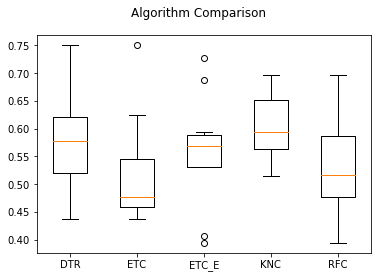

In [15]:
"""
sklearn.tree.DecisionTreeClassifier
sklearn.tree.ExtraTreeClassifier
sklearn.ensemble.ExtraTreesClassifier
sklearn.neighbors.KNeighborsClassifier
sklearn.neural_network.MLPClassifier
sklearn.neighbors.RadiusNeighborsClassifier
sklearn.ensemble.RandomForestClassifier
sklearn.linear_model.RidgeClassifierCV
"""


# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV


# prepare models
models = []
models.append(('DTR', DecisionTreeClassifier())) 
models.append(('ETC', ExtraTreeClassifier()))
models.append(('ETC_E', ExtraTreesClassifier()))
models.append(('KNC', KNeighborsClassifier()))
##models.append(('MLPC', MLPClassifier()))
#models.append(('RNC', RadiusNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
#models.append(('RC', RidgeClassifierCV()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'


for name, model in models: #iterate through each of the different models
    #Use k-fold validation to determine model accuracy. k-fold validation is one of many ways, but it is the gold standard way.
    try:
        kfold = KFold(n_splits=10, random_state=7) #initiate k-fold validation. Here, we use 10-folds.
        cv_results = cross_val_score(model, standardized_X, y_train, cv=kfold, scoring=scoring) #apply model in turns.
        results.append(cv_results)
        names.append(name)
    except:
        print('Error in:', name, 'and', model)
        
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# (II) Apply PCA - Need to use onehotencoder!!

(a) Apply pca

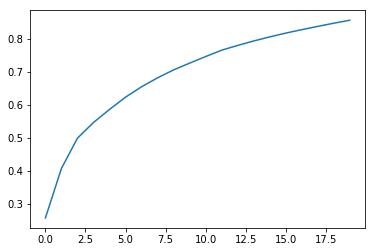

In [16]:
#Perform pca
from sklearn.decomposition import PCA

pca=PCA(n_components=20) #generate model

X_pca=pca.fit_transform(df.iloc[:,1:726])

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(20),pca.explained_variance_ratio_.cumsum())
plt.show()

In [17]:
#split datasets into train/test datasets for PCA

from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_pca, y_label, test_size=0.2, random_state=13)

#normalize datasets
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train_pca)
standardized_X_pca=scaler.transform(X_train_pca)
standardized_X_test_pca=scaler.transform(X_test_pca)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)
model.fit(standardized_X_pca,y_train_pca)

model.score(standardized_X_test_pca,y_test_pca)

0.69135802469135799

(b) Apply pca and knn

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=1)
model.fit(standardized_X_pca,y_train_pca)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
model.score(standardized_X_test_pca,y_test_pca)

0.64197530864197527

- Score is the same!

(c) Tune n_component and n_neighbor simultaneously

In [21]:
#Let's tune the knn n_neighbors parameter
components = [5, 10, 15, 20, 25, 30] #optimize using up to 50 components
neighbors = [1, 2, 3, 4, 5, 6, 7] #and using up to 7 neighbors

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

from sklearn.neighbors import KNeighborsClassifier

#show PCA scores as a function of neighbors, N, and no. of components
for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(standardized_X_pca[:,:component], y_train_pca)
        score = knn.score(standardized_X_test_pca[:,:component], y_test_pca)
        #predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)  

Components =  5 , neighbors =  1 , Score =  0.567901234568
Components =  5 , neighbors =  2 , Score =  0.444444444444
Components =  5 , neighbors =  3 , Score =  0.506172839506
Components =  5 , neighbors =  4 , Score =  0.456790123457
Components =  5 , neighbors =  5 , Score =  0.481481481481
Components =  5 , neighbors =  6 , Score =  0.444444444444
Components =  5 , neighbors =  7 , Score =  0.469135802469
Components =  10 , neighbors =  1 , Score =  0.666666666667
Components =  10 , neighbors =  2 , Score =  0.604938271605
Components =  10 , neighbors =  3 , Score =  0.654320987654
Components =  10 , neighbors =  4 , Score =  0.62962962963
Components =  10 , neighbors =  5 , Score =  0.62962962963
Components =  10 , neighbors =  6 , Score =  0.555555555556
Components =  10 , neighbors =  7 , Score =  0.555555555556
Components =  15 , neighbors =  1 , Score =  0.641975308642
Components =  15 , neighbors =  2 , Score =  0.592592592593
Components =  15 , neighbors =  3 , Score =  0.69

# (III) Apply NN and CNN
ref.: https://github.com/keras-team/keras/issues/741

For multilabel classification, I am using sigmoid activation in place of softmax in the output layer and then use "binary_crossentrpy" loss.


(a) NN

In [22]:
# (III) Apply NN

#import classes
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from keras.utils import to_categorical

#establish random number
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [23]:
from numpy import array
#define model
num_pixels=725
num_classes=10


In [24]:
#NEED TO SOMEHOW FIX the onehotencoder, so the values don't change!!!

In [25]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #https://datascience.stackexchange.com/questions/16182/multiple-output-classes-in-keras/16204#16204
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid')) #Can't use softmax, instead use sigmoid
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(standardized_X, y_train, validation_data=(standardized_X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(standardized_X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 324 samples, validate on 81 samples
Epoch 1/10
 - 1s - loss: 0.6462 - acc: 0.6633 - val_loss: 0.3299 - val_acc: 0.8889
Epoch 2/10
 - 0s - loss: 0.2707 - acc: 0.9136 - val_loss: 0.2415 - val_acc: 0.9160
Epoch 3/10
 - 0s - loss: 0.1812 - acc: 0.9429 - val_loss: 0.2115 - val_acc: 0.9296
Epoch 4/10
 - 0s - loss: 0.1410 - acc: 0.9522 - val_loss: 0.1953 - val_acc: 0.9284
Epoch 5/10
 - 0s - loss: 0.1127 - acc: 0.9611 - val_loss: 0.1853 - val_acc: 0.9432
Epoch 6/10
 - 0s - loss: 0.0917 - acc: 0.9685 - val_loss: 0.1779 - val_acc: 0.9457
Epoch 7/10
 - 0s - loss: 0.0775 - acc: 0.9747 - val_loss: 0.1711 - val_acc: 0.9469
Epoch 8/10
 - 0s - loss: 0.0669 - acc: 0.9787 - val_loss: 0.1660 - val_acc: 0.9457
Epoch 9/10
 - 0s - loss: 0.0591 - acc: 0.9799 - val_loss: 0.1612 - val_acc: 0.9457
Epoch 10/10
 - 0s - loss: 0.0524 - acc: 0.9836 - val_loss: 0.1577 - val_acc: 0.9494
Baseline Error: 5.06%


In [35]:
np.round(model.predict_on_batch(standardized_X[0].reshape(1,725)))

array([[ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [26]:
##### check model
import decimal
    
check_model=standardized_X[0].reshape(1,725)
np.round(model.predict(check_model))

array([[ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [27]:
np.around(y_test[0])

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [28]:
for i in range(20,30):
    #print(i)
    #print(np.around(model.predict(i.reshape(1,725))))
    #print(np.around(model.predict(standardized_X[i].reshape(1,725))))
    #print(y_test[i])
    #print('\n')
    
    print(np.around(model.predict(standardized_X[i].reshape(1,725))))
    print(y_train[i])
        

[[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]]
[1 0 1 0 0 0 0 0 0 1]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[1 0 0 0 0 1 1 0 0 0]
[[ 1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]
[1 0 0 1 0 0 0 0 0 0]
[[ 1.  1.  0.  0.  0.  0.  0.  0.  1.  0.]]
[1 1 0 0 0 0 0 0 1 0]
[[ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
[1 0 0 0 0 0 0 1 0 0]
[[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
[1 0 1 0 0 0 0 0 0 0]
[[ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]]
[1 0 1 0 0 0 0 0 0 1]
[[ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]
[1 0 0 0 0 0 0 1 0 0]
[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
[1 1 0 0 0 0 0 0 0 0]
[[ 1.  0.  1.  1.  1.  0.  0.  0.  0.  0.]]
[1 0 1 1 1 0 0 0 0 0]


(b) CNN

In [29]:
import numpy

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

#https://keras.io/getting-started/sequential-model-guide/
from keras.layers import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [30]:
#first, need to re-shape the data
standardized_X_cnn=standardized_X.reshape(324,1,25,29)
standardized_X_test_cnn=standardized_X_test.reshape(81,1,25,29)


In [31]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 25, 29), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid')) #can't use softmax, instead use sigmoid
    
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [32]:
# build the model
model_cnn = larger_model()
# Fit the model
model_cnn.fit(standardized_X_cnn, y_train, validation_data=(standardized_X_test_cnn, y_test), epochs=100, batch_size=200, verbose=2)

# Final evaluation of the model
scores_cnn = model_cnn.evaluate(standardized_X_test_cnn, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_cnn[1]*100))

Train on 324 samples, validate on 81 samples
Epoch 1/100
 - 3s - loss: 0.6420 - acc: 0.6509 - val_loss: 0.5783 - val_acc: 0.7605
Epoch 2/100
 - 1s - loss: 0.5623 - acc: 0.7580 - val_loss: 0.5109 - val_acc: 0.8136
Epoch 3/100
 - 2s - loss: 0.4965 - acc: 0.8222 - val_loss: 0.4630 - val_acc: 0.8272
Epoch 4/100
 - 1s - loss: 0.4565 - acc: 0.8383 - val_loss: 0.4373 - val_acc: 0.8432
Epoch 5/100
 - 1s - loss: 0.4389 - acc: 0.8500 - val_loss: 0.4139 - val_acc: 0.8543
Epoch 6/100
 - 1s - loss: 0.4153 - acc: 0.8528 - val_loss: 0.3904 - val_acc: 0.8506
Epoch 7/100
 - 1s - loss: 0.3949 - acc: 0.8537 - val_loss: 0.3770 - val_acc: 0.8617
Epoch 8/100
 - 2s - loss: 0.3770 - acc: 0.8571 - val_loss: 0.3713 - val_acc: 0.8778
Epoch 9/100
 - 1s - loss: 0.3712 - acc: 0.8599 - val_loss: 0.3639 - val_acc: 0.8765
Epoch 10/100
 - 1s - loss: 0.3600 - acc: 0.8645 - val_loss: 0.3538 - val_acc: 0.8741
Epoch 11/100
 - 1s - loss: 0.3463 - acc: 0.8682 - val_loss: 0.3441 - val_acc: 0.8679
Epoch 12/100
 - 1s - loss: 0.

KeyboardInterrupt: 

In [ ]:
check_cnn=standardized_X_test_cnn[0].reshape(1,1,25,29)
np.round(model_cnn.predict(check_cnn))


In [ ]:
y_test[0]

- the answer seems off. How to make sure that the onehotencoder remain to be integers?

Two issues:
- fix onehot encoder in keras, si it remain categorical
- utilize conv1D rather than conv2D.